<a href="https://colab.research.google.com/github/MonishSoundarRaj/data_check_generator/blob/main/JSSPP_Plots_and_Metrics_cg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn
import pandas as pd
from datetime import datetime
from collections import Counter, defaultdict
import json
from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
bw_df = pd.read_csv("blue_waters_data_training.csv")
philly_df = pd.read_csv("philly_data_training.csv")
hl_df = pd.read_csv("helios_data_training.csv")
th_df = pd.read_csv("theta_data_training.csv")
# Syn_data_below
bw_syn_df = pd.read_csv("./synthetic_data_cg_bw.csv")
philly_syn_df = pd.read_csv("./synthetic_data_cg_philly.csv")
helios_syn_df = pd.read_csv("./synthetic_data_cg_helios.csv")
th_syn_df = pd.read_csv("./synthetic_data_cg_theta.csv")

In [3]:
print(bw_df.shape)
print(philly_df.shape)
print(hl_df.shape)
print(th_df.shape)
print(bw_syn_df.shape)
print(philly_syn_df.shape)
print(helios_syn_df.shape)
print(th_syn_df.shape)

(15000, 12)
(15000, 13)
(15000, 13)
(15000, 12)
(15000, 12)
(15000, 13)
(15000, 13)
(15000, 12)


In [4]:
# columns=["job", "user", "project", "state", "gpu_num", "cpu_num", "node_num",  "run_time", "wall_time", "new_status", "interval"]

In [5]:
bw_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0,1987,36,22,50,0,30,41.048450,57100,34939,4630253,Killed
1,1,4899,63,19,0,768,460,421.990613,2548,31910,28633439,Pass
2,2,482,49,5,30,0,1,0.992794,1062,172800,1251,Pass
3,3,1905,25,4,1,512,512,56.069698,2567,172800,97457826,Pass
4,4,10885,70,66,0,48,628,125.578149,8029,430,3765,Pass


In [6]:
philly_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0,5619,80,8,48,0,1,327.238100,73.020289,0,154.887131,202.302542,Failed
1,1,6882,33,7,1,0,2,631.669261,54.533145,0,68.897325,74.333585,Failed
2,2,452,75,10,1,0,1,41.714561,65.652379,0,373.725529,497.403969,Pass
3,3,4236,48,4,1,0,1,20.853978,35.166489,0,114.309328,41.214629,Pass
4,4,8006,33,5,1,0,1,0.000000,33.935780,0,782.396751,117.937120,Failed


In [7]:
helios_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0,10452,20,11,7,800,4,10.300594,65.362901,0,1311.313002,997.796826,Killed
1,1,10138,20,11,32,320,4,12.440752,1173.815704,0,236291.790477,320.526752,Killed
2,2,2244,6,5,1,1,1,49.457657,10267.281650,0,21664.942898,48.118342,Pass
3,3,1080,21,4,16,1,1,75.123345,32345.881799,0,138544.995222,8661.428058,Pass
4,4,12010,20,11,144,280,7,73.397997,8.801739,0,132.545341,51.966785,Killed


In [8]:
th_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0,4126,8,8,0,64.0,8.0,142.539974,163.856415,3547.652398,0.857397,Pass
1,1,624,1,23,0,32768.0,256.0,255.488833,26819.650128,21710.931258,2164.458682,Pass
2,2,3382,32,5,0,512.0,8.0,661.560442,1941.924115,3581.170218,3.280155,Pass
3,3,1453,25,4,0,64.0,2.0,558.995305,41.154303,1844.447585,0.013615,Pass
4,4,123,6,6,0,57600.0,3180.0,10.880195,2755.612824,6958.471675,3287.144692,Pass


In [9]:
def plot_cdf(x, bins, xlabel, ylabel="Frequency (%)", color="", linestyle="--"):
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        x = np.sort(x)
        cdf = 100 * np.arange(len(x)) / float(len(x))
        if color:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5, color=color)
        else:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.margins(0)
        plt.ylim(0, 100)
        plt.xlim(10**0, 10**8)
        plt.grid(True)
        plt.style.use("default")

# Core Plots

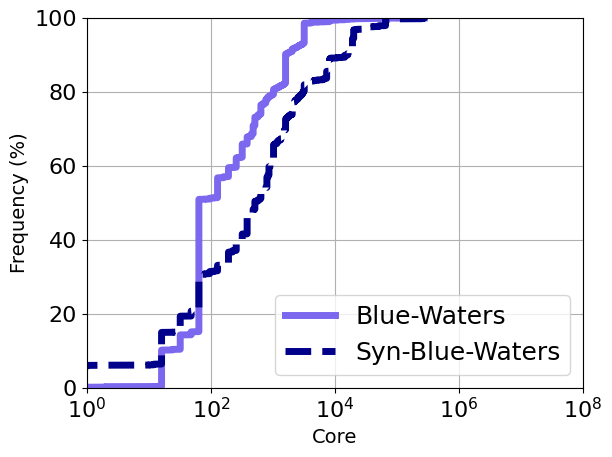

In [10]:
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_df.iterrows()], 100000, "Core", color = "#7B68EE", linestyle="-")
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_syn_df.iterrows()], 100000, "Core", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

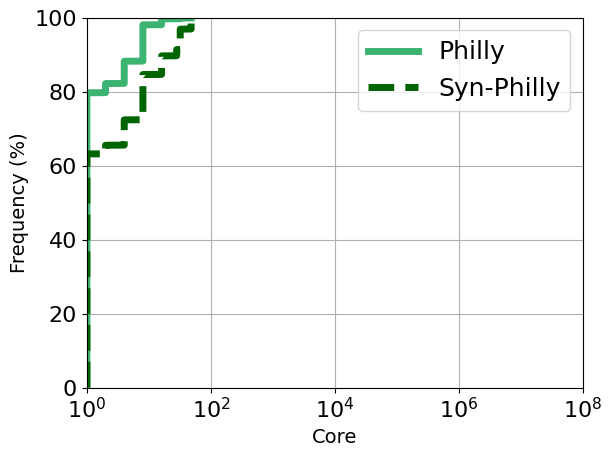

In [11]:
plot_cdf(philly_df["gpu_num"], 100000, "Core", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["gpu_num"], 100000, "Core", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

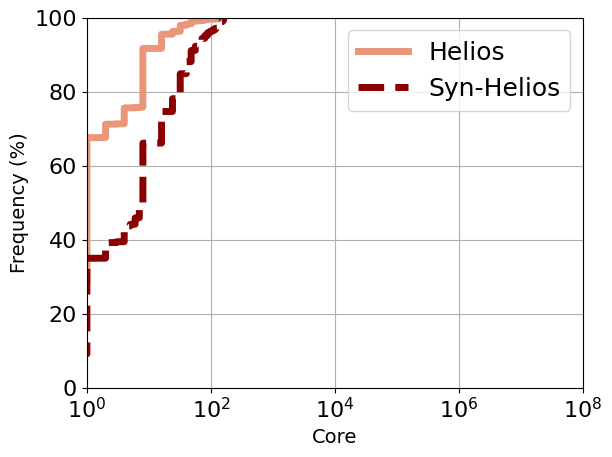

In [12]:
plot_cdf(hl_df["gpu_num"], 100000, "Core", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["gpu_num"], 100000, "Core", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

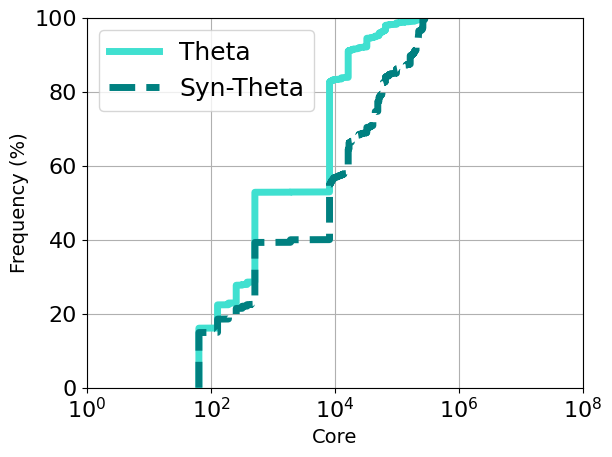

In [13]:
plot_cdf(th_df["cpu_num"], 100000, "Core", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["cpu_num"], 100000, "Core", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

#Run Time Plots

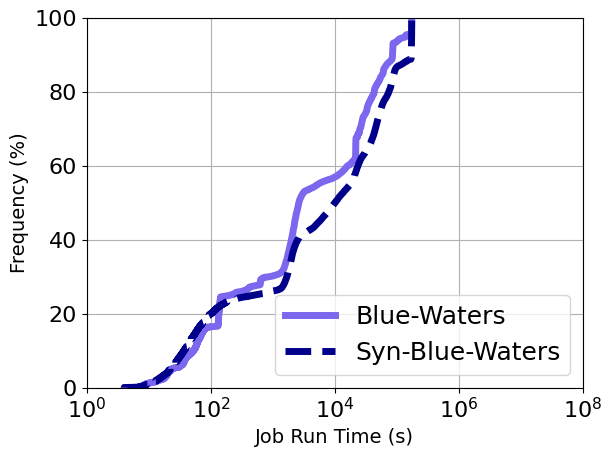

In [14]:
plt.style.use("default")
plot_cdf(bw_df["run_time"], 1000,"Job Run Time (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["run_time"], 1000,"Job Run Time (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

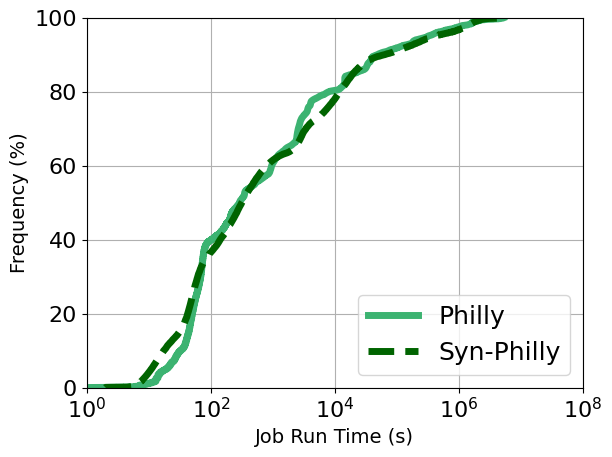

In [15]:
plt.style.use("default")
plot_cdf(philly_df["run_time"], 1000,"Job Run Time (s)", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["run_time"], 1000,"Job Run Time (s)", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

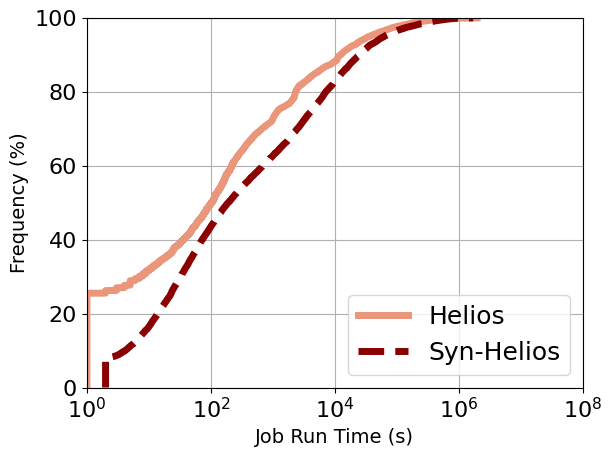

In [16]:
plt.style.use("default")
plot_cdf(hl_df["run_time"], 10009999,"Job Run Time (s)", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["run_time"], 10009999,"Job Run Time (s)", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

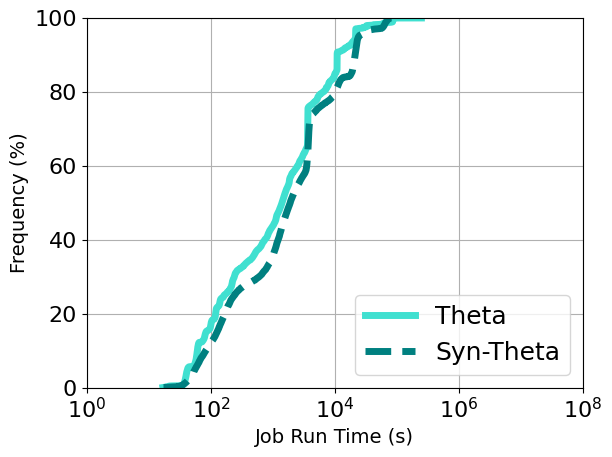

In [17]:
plt.style.use("default")
plot_cdf(th_df["run_time"], 1000, "Job Run Time (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["run_time"], 1000, "Job Run Time (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Interval Plots


In [18]:
def get_interval(a, peak=False):
    def get_time_of_day2(time):
        time = datetime.fromtimestamp(time)
        return (time.hour + (time.minute>30))%24
    if peak:
        z = a.apply(get_time_of_day2)
        b = a-a.shift(1)
        c = b[(z>=8) & (z<=17)]
        return c
    return a-a.shift(1)

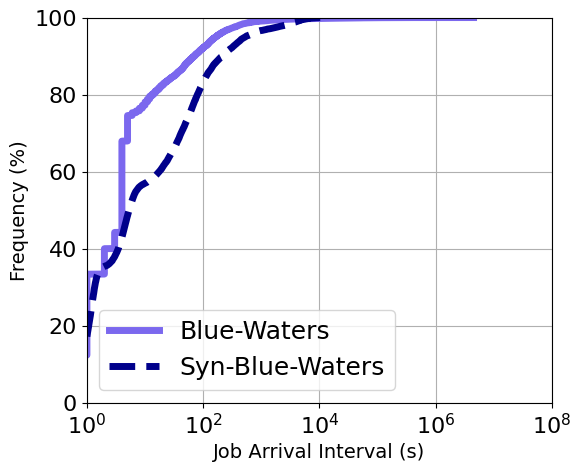

In [19]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(bw_df["interval"], 10000,"Job Arrival Interval (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["interval"], 10000,"Job Arrival Interval (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

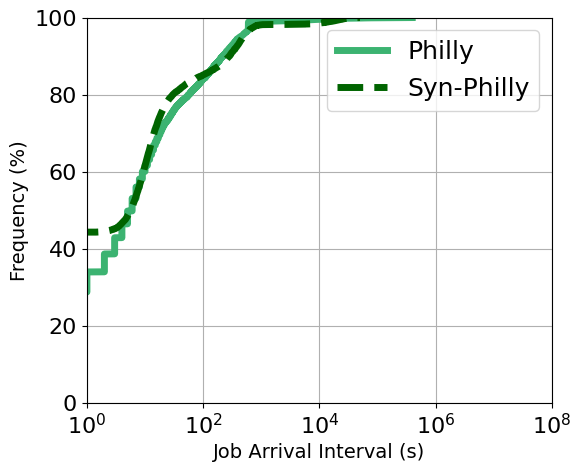

In [20]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(philly_df["interval"], 1000,"Job Arrival Interval (s)", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["interval"], 1000,"Job Arrival Interval (s)", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

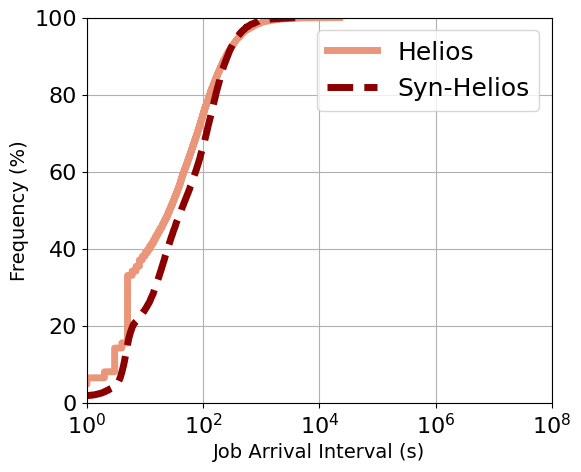

In [21]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(hl_df["interval"], 10009999,"Job Arrival Interval (s)", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["interval"], 10009999,"Job Arrival Interval (s)", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")


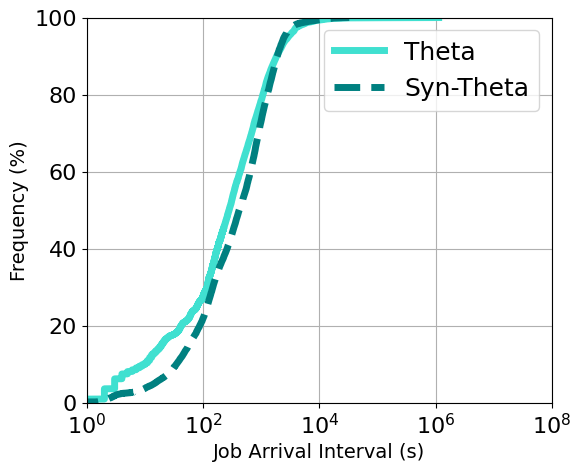

In [22]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(th_df["interval"], 100099,"Job Arrival Interval (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["interval"], 100099,"Job Arrival Interval (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# User CDF Plots

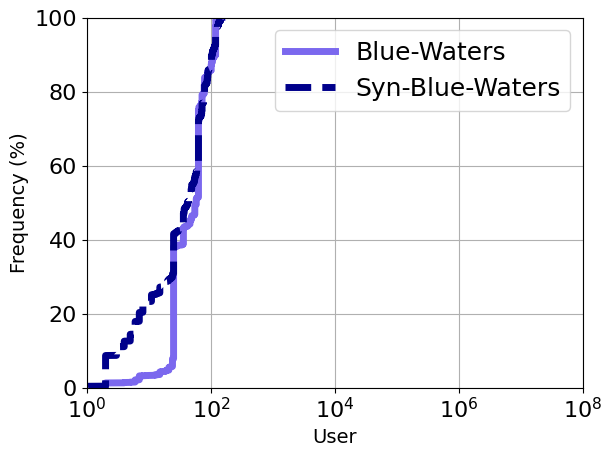

In [23]:
plt.style.use("default")
plot_cdf(bw_df["user"], 1000,"User", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["user"], 1000,"User", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

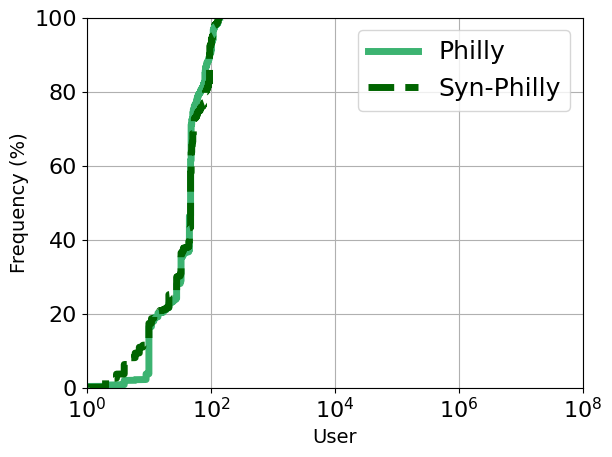

In [24]:
plt.style.use("default")
plot_cdf(philly_df["user"], 1000,"User", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["user"], 1000,"User", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

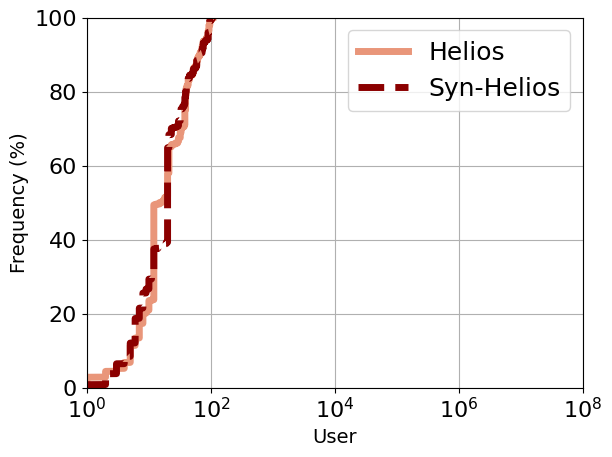

In [25]:
plt.style.use("default")
plot_cdf(hl_df["user"], 10009999,"User", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["user"], 10009999,"User", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

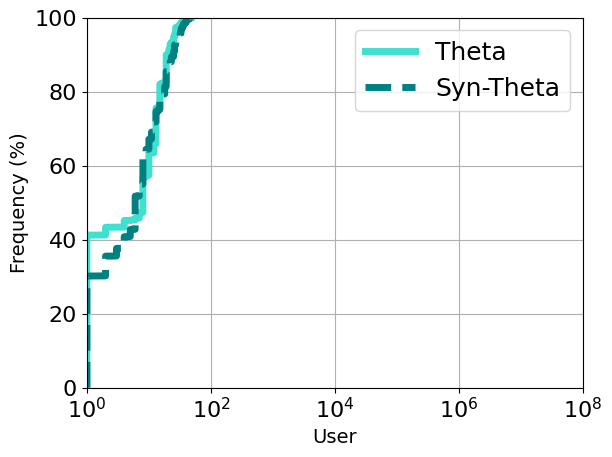

In [26]:
plt.style.use("default")
plot_cdf(th_df["user"], 1000, "User", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["user"], 1000, "User", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Wall Time Plots

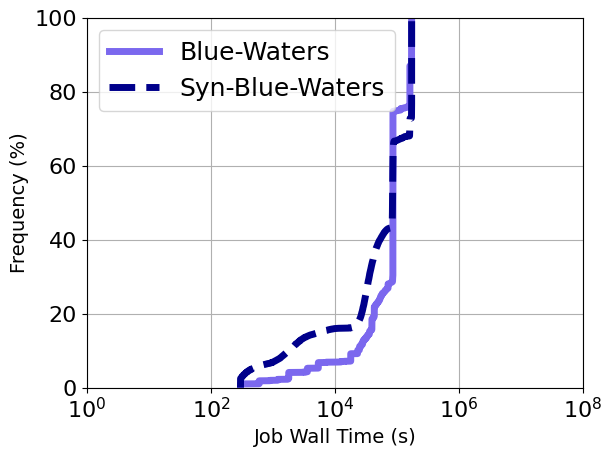

In [27]:
plt.style.use("default")
plot_cdf(bw_df["wall_time"], 1000,"Job Wall Time (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["wall_time"], 1000,"Job Wall Time (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

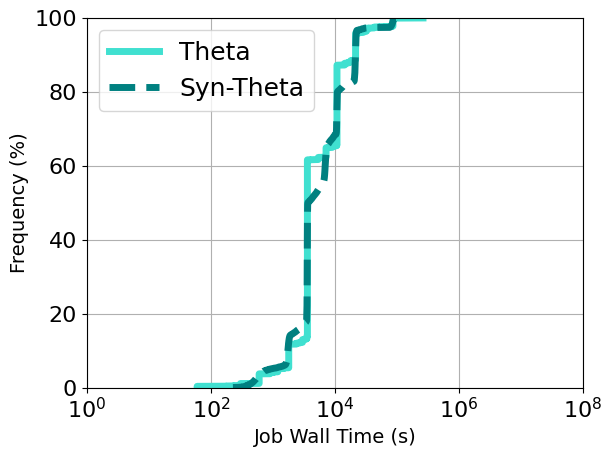

In [28]:
plt.style.use("default")
plot_cdf(th_df["wall_time"], 1000, "Job Wall Time (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["wall_time"], 1000, "Job Wall Time (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Calc Metrics

In [29]:
import argparse
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import entropy
from scipy.stats import wasserstein_distance
import os


'''
This function return a float value. It takes two data files and the interested feature as inputs.
It calculates the distance between these two datasets and outputs a quantitive value.
'''

#A simple function to create a Probability Mass Function out of a dataframe
#Takes in one dataframe as input, and outputs an array containing the probability of each unique event in each field of the dataframe
def createPMF(data):
    length = data.shape[1]
    data = data.values.tolist()
    pmf = []

    #Loop through each of the 13 categories in each job trace
    for i in range(length):
        #Find the number of unique occurences within each category
        #print(i)
        temp = []
        occurence = []
        for col in data:
          #print(col)
          if col[i] not in temp:
            temp.append(col[i])
            occurence.append(1)
            #print(col[i])
          else:
            k = temp.index(col[i])
            occurence[k] += 1

        #Divide each occurence by the total number of datapoints (counting repeats), to get the relative frequency of each element
        total = sum(occurence)
        for i in range(len(occurence)):
          occurence[i] = occurence[i] / total

        #Now add the values and their probabilities to the pmf list
        pmf.append([temp, occurence])

    return pmf

#Function to process the strings in the new_status column (needed for the corr funcs)
def preprocess(data):
    ind = 0
    for i in range(len(data['new_status'])):
        if data.loc[i, 'new_status'] == 'Pass': data.loc[i, 'new_status'] = 1
        if data.loc[i, 'new_status'] == 'Failed': data.loc[i, 'new_status'] = 0
        if data.loc[i, 'new_status'] == 'Killed': data.loc[i, 'new_status'] = -1
        ind += 1

#Function to find and return the Kulback-Leibler divergence of two csv files created using the PMF function above
#Takes in two files, outputting the KL divergences of every feature inside a dataframe
def calc_kl(file1, file2):
    #Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    kl_divs = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)
        #Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        index = df1.columns.get_loc(feature)

        # Ensure that both dists are of equal length
        if len(p) > len(q):
            n = len(p) - len(q)
            for i in range(n):
                q.append(1e-20) #Append an incredibly small number to make up for the difference in dataset length. Note that doing this rather than just shortening the sample dataset to 10000 points has little to no difference
        else:
            n = len(q) - len(p)
            for i in range(n):
                p.append(1e-20)

        # Calculate KL divergence
        kl_divs.loc[0, feature] = entropy(p, q)
    print("")
    print("------------Kulback-Leibler Divergence------------")
    print(kl_divs)


#Function to calculate the difference in correlation between a feature shared by two datasets
#Takes in two files as input, outputting a dataframe containing the % difference in the correlation coefficients of the feature in either file
#Results can be interpreted as 'the correlation coefficient of file1's feature is *calc_corr* % larger/smaller than file2's feature
def calc_corr(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    preprocess(df1)
    preprocess(df2)

    corr1 = df1.corr(numeric_only=False)
    corr2 = df2.corr(numeric_only=False)

    #Divide the two correlations to obtain the % difference, storing each entry in a new dataframe
    corr_df = pd.DataFrame(corr1 / corr2)
    print("")
    print("------------Correlation------------")
    print(corr_df)

#Function to calculate how correlated an interested feature is in two different datasets
#Takes in two files, outputting a dataframe containing the correlation coefficients that describes how correlated the features are between either dataset
def calc_corr_with(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    preprocess(df1)
    preprocess(df2)
    print("")
    print("------------Correlation Coefficients------------")
    print(df1.corrwith(df2,numeric_only=True))

#Function to calculate the hellinger distance between a feature shared by two different datasets
#Takes in two files, outputting a dataframe containing the distance metrics for each feature.
def calc_hellinger(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    hellinger = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)

        # Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        # Ensure that both dists are of equal length
        if len(p) > len(q):
            n = len(p) - len(q)
            for i in range(n):
                q.append(
                    1e-20)  # Append an incredibly small number to make up for the difference in dataset length. Note that doing this rather than just shortening the sample dataset to 10000 points has little to no difference
        else:
            n = len(q) - len(p)
            for i in range(n):
                p.append(1e-20)

        sum = 0
        for i in range(len(p)):
            sum += (np.sqrt(p[i]) - np.sqrt(q[i])) ** 2

        #print((1 / np.sqrt(2)) * np.sqrt(sum))
        hellinger.loc[0, feature] = (1 / np.sqrt(2)) * np.sqrt(sum)

    print("")
    print("------------Hellinger------------")
    print(hellinger)
    return hellinger

#Function to calculate the wasserstein distance between a feature shared by two different datasets
#Takes in two filesas input, outputting a datatframe containing distance metrics that informs us of how dissimilar all the features are
def calc_wasserstein(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    wassersteins = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)

        # Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        #print(wasserstein_distance(p, q))
        wassersteins.loc[0, feature] = wasserstein_distance(p, q)
    print("")
    print("------------Wassersteins------------")
    print(wassersteins)
    return wassersteins


# Blue Waters Calc

In [30]:
calc_kl("blue_waters_data_training.csv", "synthetic_data_cg_bw.csv")
calc_corr("blue_waters_data_training.csv", "synthetic_data_cg_bw.csv")
calc_corr_with("blue_waters_data_training.csv", "synthetic_data_cg_bw.csv")
calc_hellinger("blue_waters_data_training.csv", "synthetic_data_cg_bw.csv")
calc_wasserstein("blue_waters_data_training.csv", "synthetic_data_cg_bw.csv")


------------Kulback-Leibler Divergence------------
  u_id        job      user   project  gpu_num  cpu_num  node_num interval  \
0  0.0  14.297876  2.955281  2.069593  3.17826  2.94381  2.903267  6.48372   

  run_time wall_time node_hour new_status  
0  1.16248  5.551808  0.501776   0.219076  

------------Correlation------------
                  u_id         job       user    project     gpu_num  \
u_id          1.000000  102.642148  84.006391 -13.917322 -175.187260   
job         102.642148    1.000000   2.019695   1.426821   -7.692875   
user         84.006391    2.019695   1.000000   5.193826    9.231464   
project     -13.917322    1.426821   5.193826   1.000000   41.515792   
gpu_num    -175.187260   -7.692875   9.231464  41.515792    1.000000   
cpu_num       8.207446   -3.160929  -5.583090 -25.894855    0.854153   
node_num     -0.619799   -0.797055   4.470492   2.940450  -10.530836   
interval     -4.811811    0.307859   1.072171   0.615694    0.148841   
run_time      9.15

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0.0,0.000044,0.004216,0.007928,0.013733,0.003687,0.006329,0.001525,0.000028,0.000498,0.000022,0.054133


# Philly Calc

In [31]:
calc_kl("philly_data_training.csv", "synthetic_data_cg_philly.csv")
calc_corr("philly_data_training.csv", "synthetic_data_cg_philly.csv")
calc_corr_with("philly_data_training.csv", "synthetic_data_cg_philly.csv")
calc_hellinger("philly_data_training.csv", "synthetic_data_cg_philly.csv")
calc_wasserstein("philly_data_training.csv", "synthetic_data_cg_philly.csv")


------------Kulback-Leibler Divergence------------
  u_id        job      user   project   gpu_num cpu_num  node_num  interval  \
0  0.0  12.085773  2.046999  0.688075  2.368236     0.0  0.165279  5.692837   

   run_time wall_time node_hour core_hour new_status  
0  2.268485       0.0  2.248595  2.111141   0.325298  

------------Correlation------------
                  u_id         job        user    project   gpu_num  cpu_num  \
u_id          1.000000  455.420426 -120.837656 -10.592860  2.898740      NaN   
job         455.420426    1.000000   17.995966  -2.533270 -0.317844      NaN   
user       -120.837656   17.995966    1.000000   2.955940  0.436554      NaN   
project     -10.592860   -2.533270    2.955940   1.000000  0.844076      NaN   
gpu_num       2.898740   -0.317844    0.436554   0.844076  1.000000      NaN   
cpu_num            NaN         NaN         NaN        NaN       NaN      NaN   
node_num      7.534478    0.989029    0.142489   0.517443  2.392711      NaN   
in

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0.0,0.000042,0.002323,0.032756,0.04135,0.0,0.048152,0.001301,0.000117,0.0,0.000117,0.000106,0.105067


# Helios Calc

In [32]:
calc_kl("helios_data_training.csv", "synthetic_data_cg_helios.csv")
calc_corr("helios_data_training.csv", "synthetic_data_cg_helios.csv")
calc_corr_with("helios_data_training.csv", "synthetic_data_cg_helios.csv")
calc_hellinger("helios_data_training.csv", "synthetic_data_cg_helios.csv")
calc_wasserstein("helios_data_training.csv", "synthetic_data_cg_helios.csv")


------------Kulback-Leibler Divergence------------
  u_id        job      user   project   gpu_num   cpu_num  node_num  interval  \
0  0.0  13.706836  2.046549  0.186506  1.370628  3.311153  2.250083  4.713087   

   run_time wall_time node_hour core_hour new_status  
0  3.525496       0.0  3.474409  3.486542   0.055606  

------------Correlation------------
                 u_id        job       user    project    gpu_num   cpu_num  \
u_id         1.000000 -81.885156  11.324364 -10.858987   0.336209 -2.199495   
job        -81.885156   1.000000  -3.505007   1.148878  -0.096420  0.446019   
user        11.324364  -3.505007   1.000000  -3.996700  -0.008026  0.404600   
project    -10.858987   1.148878  -3.996700   1.000000   0.838516  0.629400   
gpu_num      0.336209  -0.096420  -0.008026   0.838516   1.000000  2.363867   
cpu_num     -2.199495   0.446019   0.404600   0.629400   2.363867  1.000000   
node_num    -6.494973   0.688506   0.515497   0.596287   2.116622  1.920466   
interv

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0.0,0.000041,0.001034,0.014733,0.021824,0.017291,0.02886,0.00101,0.000166,0.0,0.000159,0.000141,0.064578


# Theta Calc

In [33]:
calc_kl("theta_data_training.csv", "synthetic_data_cg_theta.csv")
calc_corr("theta_data_training.csv", "synthetic_data_cg_theta.csv")
calc_corr_with("theta_data_training.csv", "synthetic_data_cg_theta.csv")
calc_hellinger("theta_data_training.csv", "synthetic_data_cg_theta.csv")
calc_wasserstein("theta_data_training.csv", "synthetic_data_cg_theta.csv")


------------Kulback-Leibler Divergence------------
  u_id        job      user   project gpu_num   cpu_num node_num  interval  \
0  0.0  14.214805  1.123105  1.161832     0.0  4.399196  3.28341  2.550554   

   run_time wall_time node_hour new_status  
0  0.129799   7.68984  0.050386   0.001266  

------------Correlation------------
                  u_id         job      user   project  gpu_num   cpu_num  \
u_id          1.000000  115.257241  7.605886 -7.850101      NaN  5.230747   
job         115.257241    1.000000 -5.758765 -2.585520      NaN  1.312346   
user          7.605886   -5.758765  1.000000  6.588097      NaN  1.233449   
project      -7.850101   -2.585520  6.588097  1.000000      NaN  0.788325   
gpu_num            NaN         NaN       NaN       NaN      NaN       NaN   
cpu_num       5.230747    1.312346  1.233449  0.788325      NaN  1.000000   
node_num      4.569025    0.663364  1.223022  0.818735      NaN  2.847274   
interval      2.070137   -4.025181  0.327749  0.

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0.0,0.000044,0.008142,0.008053,0.0,0.002444,0.002449,0.000278,0.000006,0.009367,0.000002,0.015111
